In [3]:
import sys
sys.path.append('/data4/plankton_wi17/mpl/source_domain/spcbench/bench_finetune/code')
from create_dataset import PlanktonDataset
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
%matplotlib inline

In [4]:
csv_filename = '/data4/plankton_wi17/mpl/source_domain/spcbench/bench_data/V1b/{}.csv'
img_dir = '/data5/Plankton_wi18/rawcolor_db2/images/'                         
phases = ['train', 'valid', 'test']                                           
datasets = {phase: PlanktonDataset(csv_filename = csv_filename.format(phase), 
                                   img_dir = img_dir,                         
                                   phase = phase) for phase in phases}        

In [28]:
datasets['train'].data

,Unnamed: 0,specimen_id,order,family,genus,label,images,phase
0,0,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955833-000115-001-11...,train
1,1,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955833-000116-001-35...,train
2,2,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955834-000117-001-30...,train
3,3,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955834-000120-001-56...,train
4,4,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955841-000167-001-57...,train
5,5,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955841-000168-001-57...,train
6,6,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955841-000171-001-56...,train
7,7,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955844-000193-001-20...,train
8,8,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955845-000196-001-0-...,train
9,9,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955845-000197-001-0-...,train


## Copepod Classes

In [24]:
sortCopepod = False
if sortCopepod:
    columnToSort = 'order'
else:
    columnToSort = 'label'

df = datasets['train'].data
specimen_to_img = df['images'].groupby(df['specimen_id']).apply(list).to_dict()
classes_to_specimen = df['specimen_id'].groupby(df[columnToSort]).apply(list).to_dict()
classes_to_specimen = {classes:set(classes_to_specimen[classes]) for classes in classes_to_specimen}

if sortCopepod:
    copepodClasses = ['Calanoida', 'Cyclopoida']
    classes_to_specimen = {copepod:classes_to_specimen[copepod] for copepod in copepodClasses}

dataset = {}
for classes in classes_to_specimen:
    dataset[classes] = {spc: specimen_to_img[spc] for spc in classes_to_specimen[classes]}

In [25]:
dataset.keys()

[0, 1]

=> 1. 0: Train 59


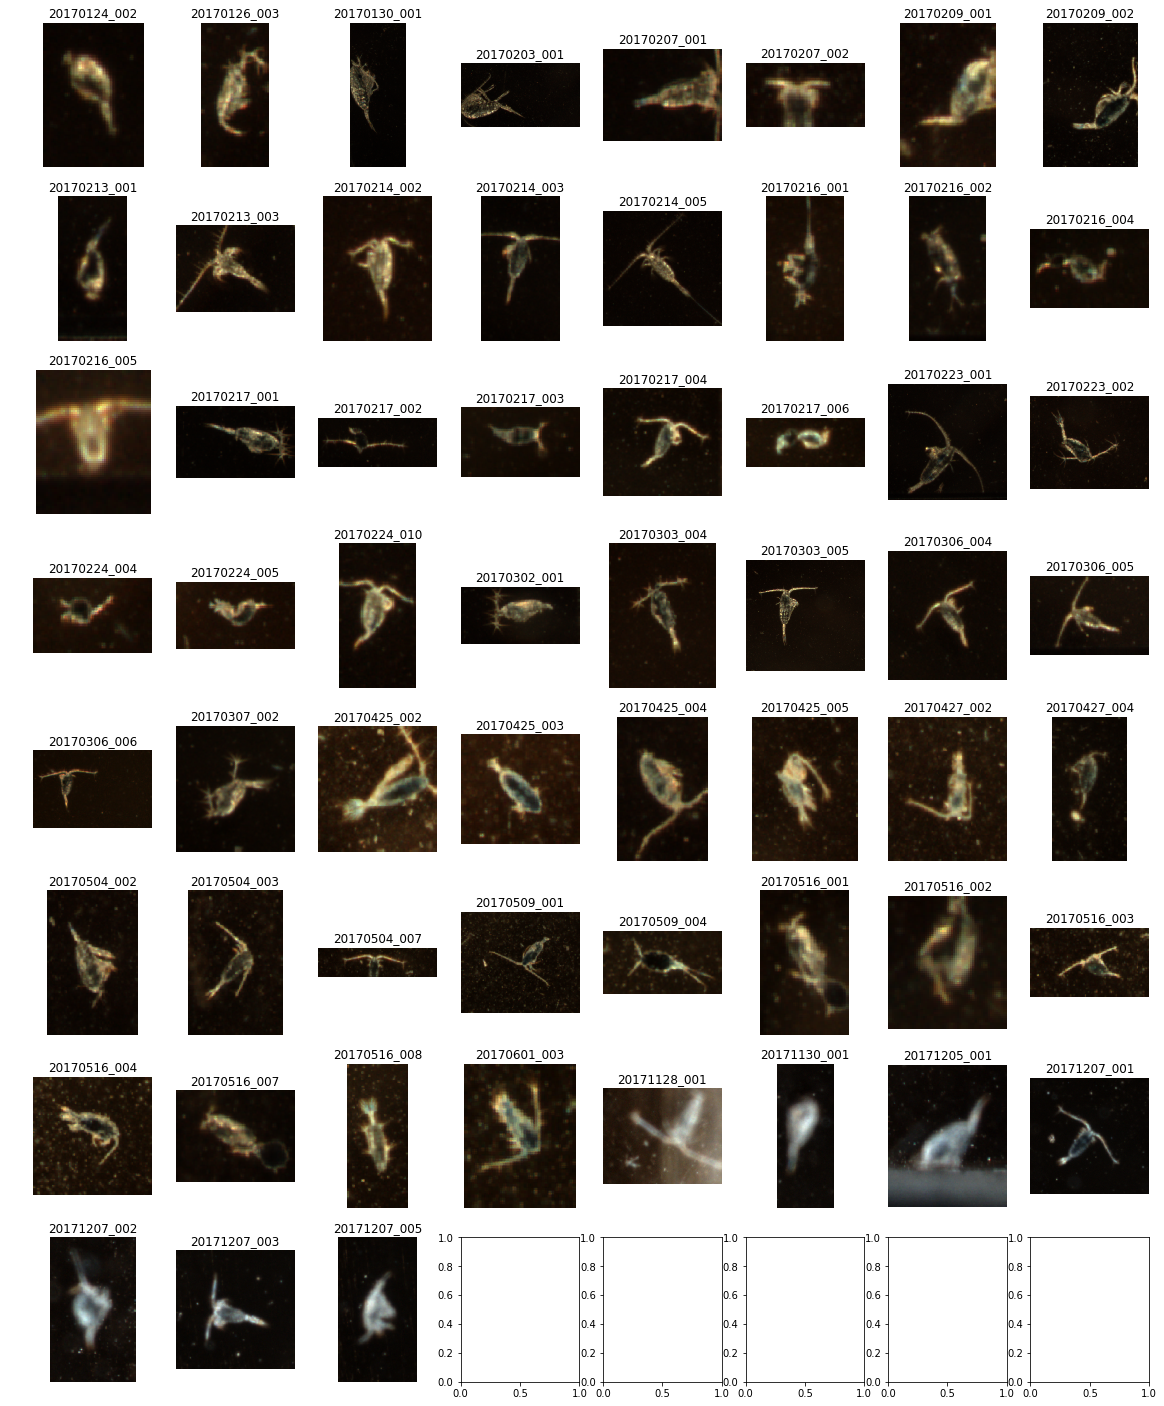

=> 2. 1: Train 60


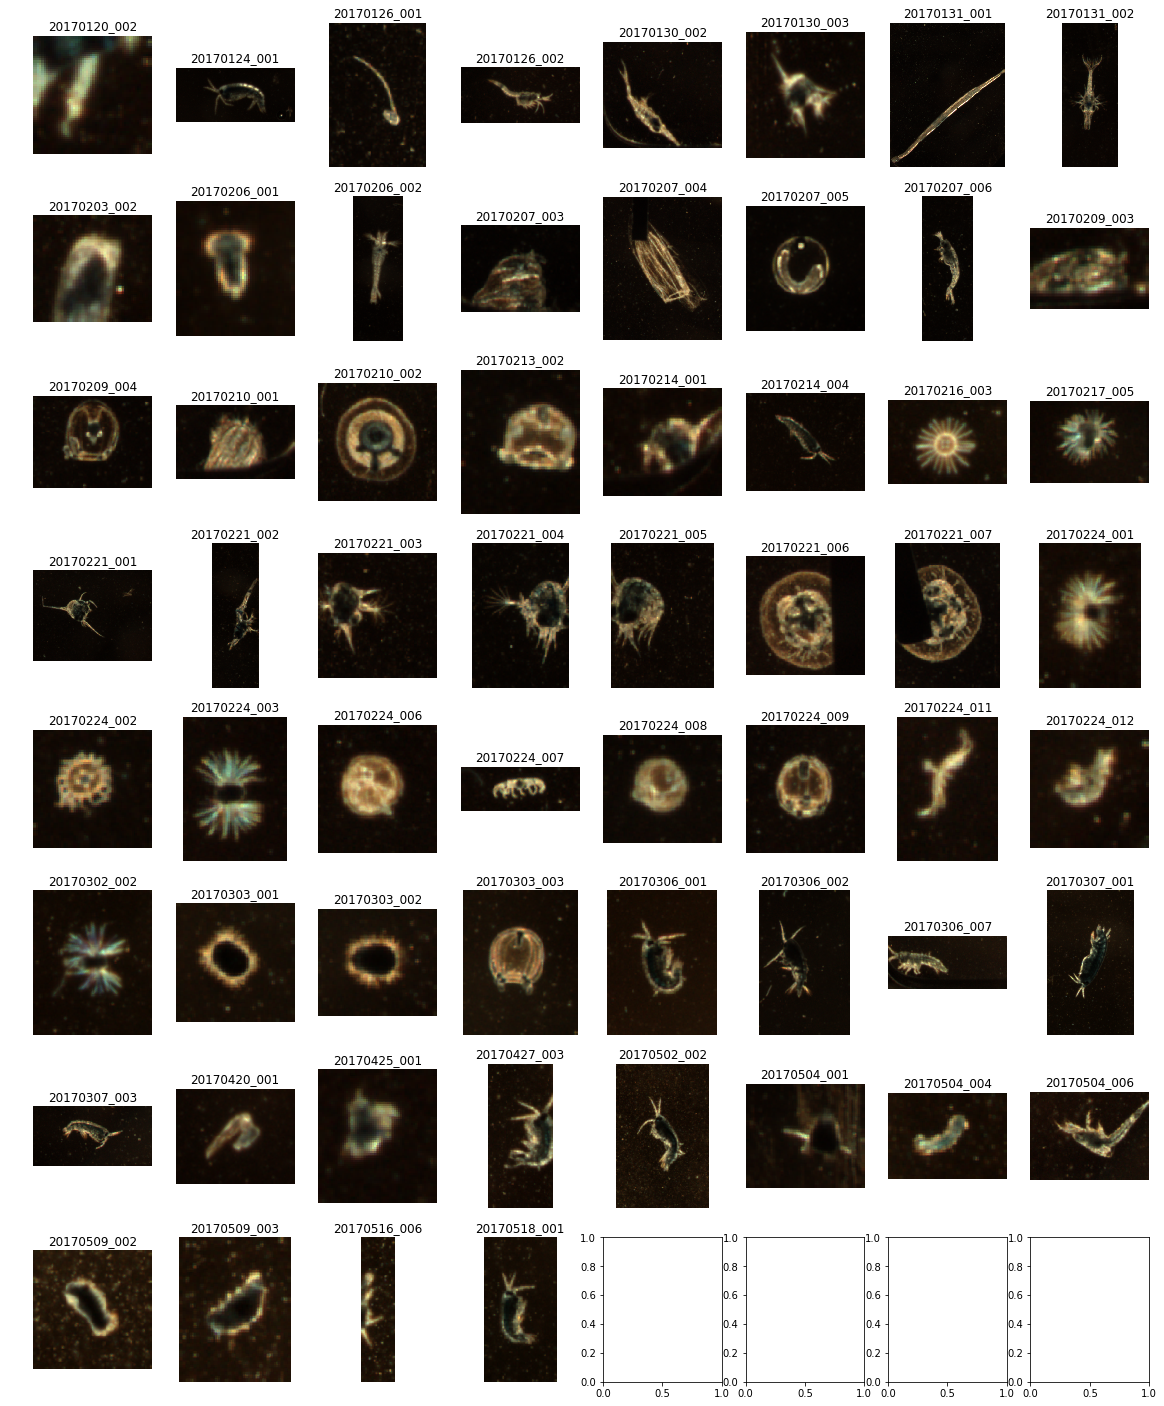

In [26]:
img_dir = '/data5/Plankton_wi18/rawcolor_db2/images'
numCols = 8
for i, cls in enumerate(dataset):
#     if i==0:
#         continue
    print('=> {}. {}: Train {}'.format(i+1, cls, len(dataset[cls])))
    fig, axarr = plt.subplots(max(len(dataset[cls])/numCols+1,2), numCols, figsize=(20,25))
    for j,spc in enumerate(sorted(dataset[cls])):
        idx = np.random.choice(dataset[cls][spc])
        img = plt.imread(os.path.join(img_dir, idx))
        axarr[j / numCols, j % numCols].imshow(img)
        axarr[j / numCols, j % numCols].set_axis_off()
        axarr[j / numCols, j % numCols].set_title('{}'.format(spc), fontsize=12)
#         if j > 70:
#             break
    plt.show()

## Set root
Select the root path of the results.csv and predictions.csv file you'd like to select


In [35]:
root = '/data4/plankton_wi17/mpl/target_domain'
source = 'spcombo'
model = 'combo_finetune'
dataset = 'all-noise100_100-100'
exp_num = 'exp4'
if dataset is not None:
    srcpath = os.path.join(root, source, model, dataset.split('_')[0], dataset, exp_num)
else:
    srcpath = os.path.join(root, source, model, exp_num)

## View Results

In [36]:
filename = '{}-{}_Results.csv'.format(model, exp_num)
resultsfn = os.path.join(srcpath, filename)
print("Viewing results for source:{}, dataset:{}, exp:{}\n".format(source, dataset, exp_num))
with open(resultsfn, 'rb') as csvf:
    csvreader = csv.reader(csvf, delimiter=',')
    for row in csvreader:
        r = '.'.join(row)
        print r

Viewing results for source:spcombo, dataset:all-noise100_100-100, exp:exp4

Binary Classifier: combo_finetune
Total Accuracy
85.69987193915169
Error Rate
14.300128060848305
Normalized Accuracy
86.9477
Normalized Error Rate
13.052300000000002
Precision Rate
41.653693132676004
Recall Rate
88.52941176470588
Confidence Level
86.17162704467773
Confusion Matrix (Raw Count):
2408.00.312.00
3373.00.19676.00
Confusion Matrix (Rate):
88.53.11.47
14.63.85.37


## Visualize  Misclassified Classes

In [30]:
filename = ('Image_preds.txt' if source == 'spcbench' else '{}-{}_pred.csv'.format(model, exp_num))
predictionFile = os.path.join(srcpath, filename)
if source == 'spcbench':
    predsDF = pd.read_csv(predictionFile, sep=' ', names=['prob1', 'prob2', 'pred'])
    predsDF = predsDF.drop(columns=['prob1', 'prob2'])
predsDF = pd.read_csv(predictionFile)

gtruthFile = root + '/aspect_target_image_path_labels.txt'
gtruthDF = pd.read_csv(gtruthFile, sep=';', names=['path', 'id', 'gtruth'])

if source == 'spcbench':
    df = pd.concat([gtruthDF, predsDF], axis=1)
else:
    df = predsDF

In [86]:
# true_positive = df['path'][(df['gtruth'] == 0) & (df['predictions'] == 0)].tolist()
# true_negative = df['path'][(df['gtruth'] == 1) & (df['predictions'] == 1)].tolist()
# false_positive = df['path'][(df['gtruth'] == 0) & (df['predictions'] == 1)].tolist()
# false_negative = df['path'][(df['gtruth'] == 1) & (df['predictions'] == 0)].tolist()
true_positive = df[(df['gtruth'] == 0) & (df['predictions'] == 0)]
true_negative = df[(df['gtruth'] == 1) & (df['predictions'] == 1)]
false_positive = df[(df['gtruth'] == 0) & (df['predictions'] == 1)]
false_negative = df[(df['gtruth'] == 1) & (df['predictions'] == 0)]
t = true_positive.sample(n=1)
t

,Unnamed: 0,path,img_id,gtruth,predictions,confidence_level
19991,19991,/data4/plankton_wi17/mpl/target_domain/image_s...,582103886,0,0,0.858234


Total count: 2217 images, displaying 100 random images


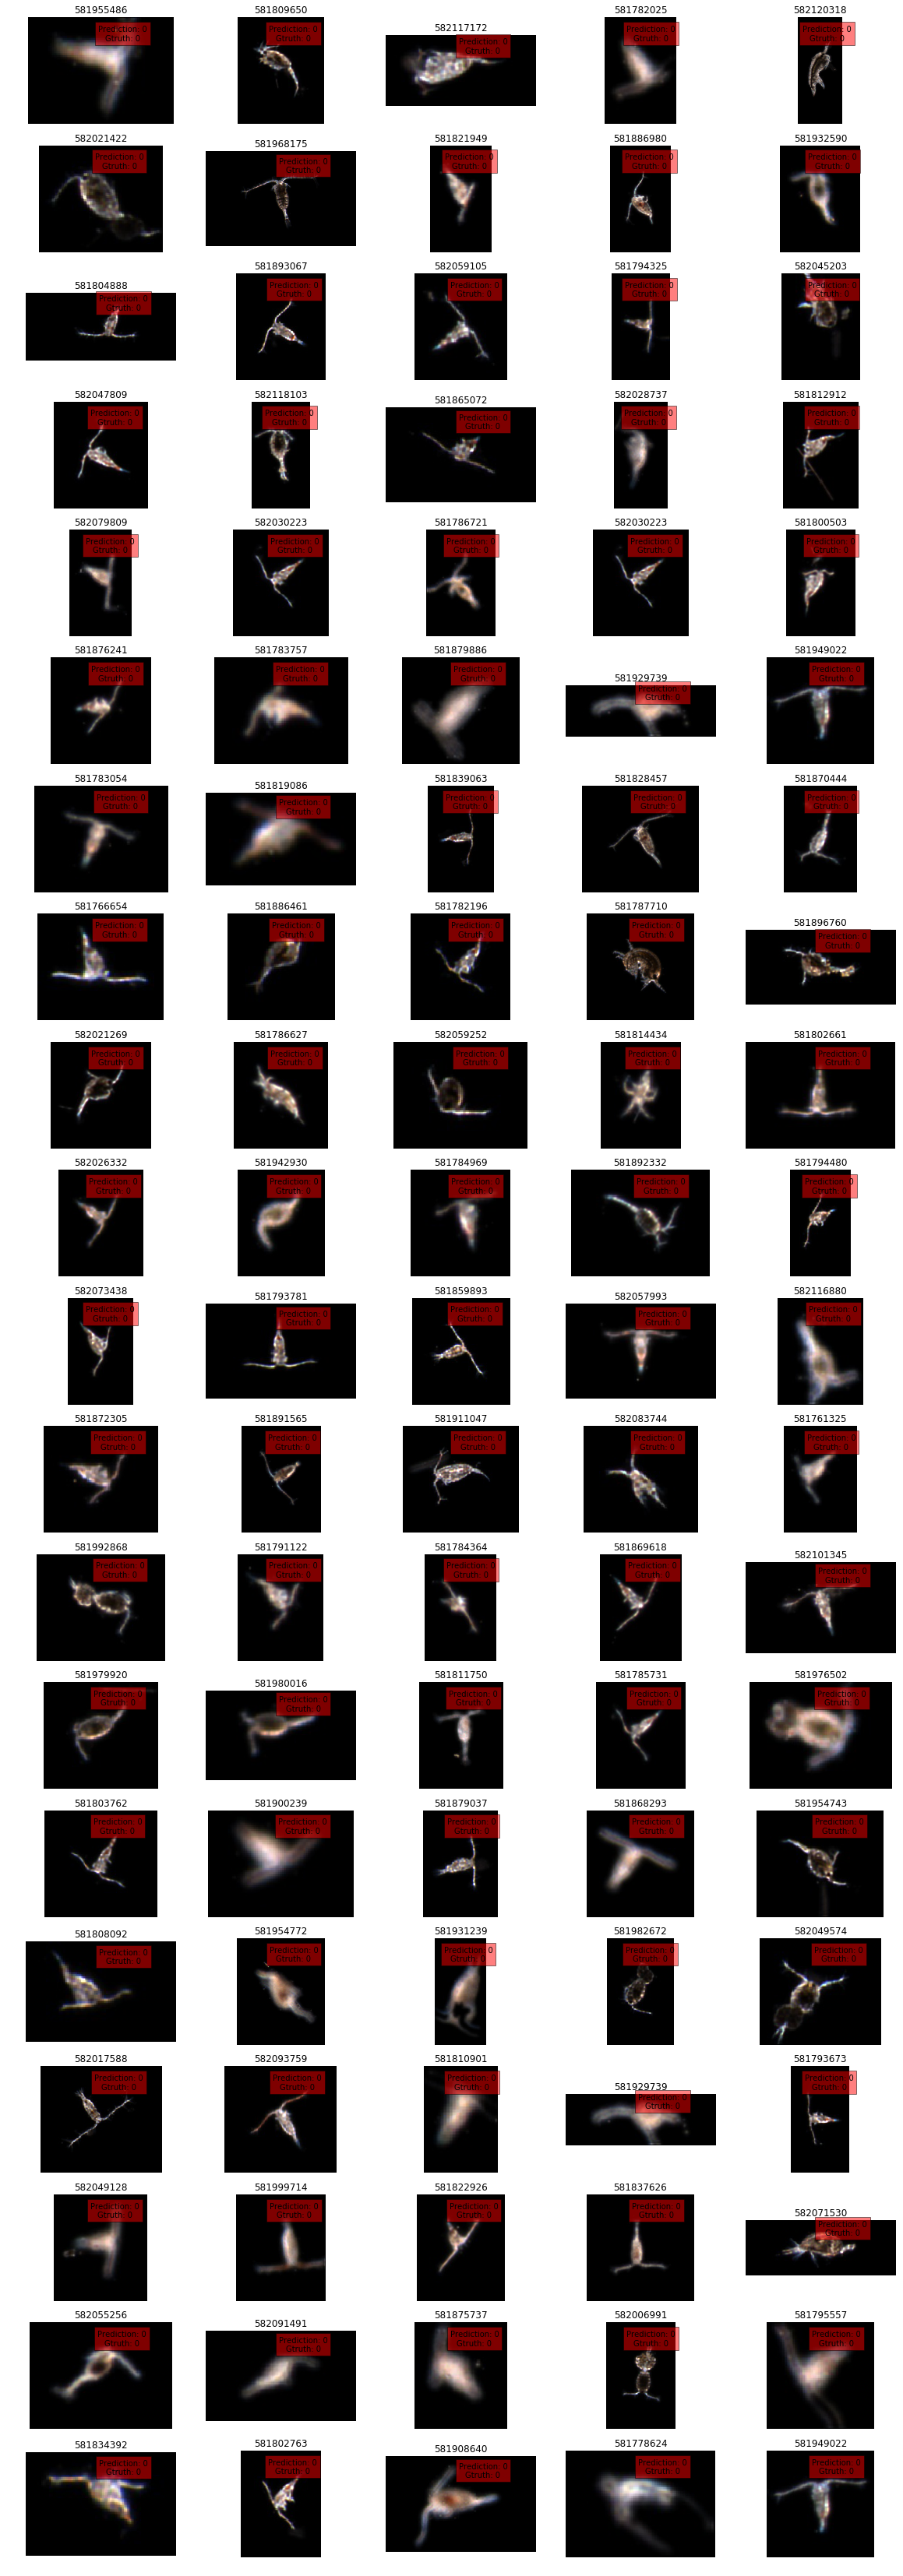

In [87]:
numRows = 20
numCols = 5
confusionDF = true_positive
print 'Total count: {} images, displaying {} random images'.format(len(confusionDF), numRows*numCols)
gtruth, pred = 0, 0
fig, axarr = plt.subplots(numRows, numCols, figsize=(20, 60))
for i in range(numRows):
    for j in range(numCols):
        randomSmpl = confusionDF.sample(n=1)
        img = plt.imread(randomSmpl['path'].values[0])
        axarr[i,j].imshow(img)
        axarr[i,j].set_axis_off()
        axarr[i,j].set_title(randomSmpl['img_id'].values[0])
        axarr[i,j].text(0.65, 0.85, 'Prediction: {}\nGtruth: {}'.format(pred, gtruth), bbox=dict(facecolor='red', alpha=0.5),
        horizontalalignment='center', verticalalignment='center', transform=axarr[i,j].transAxes)
plt.show()

Normalized Error Rate
spcbench: 24.824%
spcinsitu: 12.311%
spcombo: 14.793%


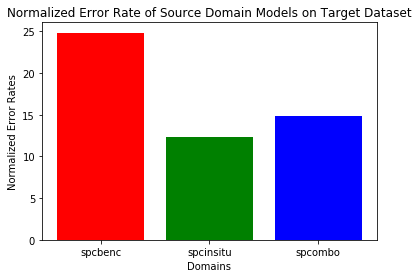

In [43]:
def generateGraphs(errorResults):
    fig, ax = plt.subplots()
    bench, insitu, combo = plt.bar(np.arange(1,4), errorResults)
    bench.set_facecolor('r')
    insitu.set_facecolor('g')
    combo.set_facecolor('b')
    ax.set_xticks(np.arange(1,4))
    ax.set_xticklabels(['spcbenc','spcinsitu','spcombo'])
    ax.set_xlabel('Domains'); ax.set_ylabel('Normalized Error Rates'); ax.set_title('Normalized Error Rate of Source Domain Models on Target Dataset')
    plt.show()
    plt.savefig('PoE.png')

def getResults(domainpath, expnum):
    resultsfn = os.path.join(domainpath, expnum, '{}-{}_Results.csv'.format(domainpath.split('/')[6],expnum))
    with open(resultsfn, 'rb') as csvf:
        csvreader = csv.reader(csvf, delimiter=',')
        for row in csvreader:
            r = '.'.join(row)
            if r == 'Normalized Error Rate':
                errorRate = csvreader.next()
                return float(errorRate[0])
            
baselinePaths = {
    'spcbench':'/data4/plankton_wi17/mpl/target_domain/spcbench/bench_finetune',
    'spcinsitu':'/data4/plankton_wi17/mpl/target_domain/spcinsitu/insitu_finetune',
    'spcombo':'/data4/plankton_wi17/mpl/target_domain/spcombo/combo_finetune/allv1b-noise100/allv1b-noise100_100-100'
}
errorResults = []
errorResults.append(getResults(baselinePaths['spcbench'], 'exp5'))
errorResults.append (getResults (baselinePaths['spcinsitu'], 'exp8'))
errorResults.append (getResults (baselinePaths['spcombo'], 'exp2'))
print('Normalized Error Rate')
for i,domain in enumerate(baselinePaths):
    print('{}: {:0.3f}%'.format(domain, errorResults[i]))
generateGraphs(errorResults)